In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import datetime as dt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA

In [26]:
file = 'use_of_force_model_data.csv'
data = pd.read_csv(file, index_col = 0)
data

,datetime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,...,Newham,Out of force,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,is force required?
0,2020-04-01 00:12:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-04-01 01:30:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020-04-01 03:30:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2020-04-01 04:25:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020-04-01 04:12:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147890,2021-01-31 18:00:00,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
147891,2021-01-31 15:20:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147892,2021-01-31 22:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147893,2021-01-31 19:48:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data.drop(columns = 'datetime', inplace = True)

In [28]:
data.head()

,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,Incident Location: Police vehicle without prisoner handling cage,...,Newham,Out of force,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,is force required?
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
data_small = data.sample(20000, random_state = 7)

In [30]:
for i in data_small.columns:
    print(data_small[i].value_counts())

1    11564
0     8436
Name: Incident Location: Street/Highway, dtype: int64
0    19801
1      199
Name: Incident Location: Public Transport, dtype: int64
0    19611
1      389
Name: Incident Location: Retail Premises, dtype: int64
0    19208
1      792
Name: Incident Location: Open ground (e.g. park, car park, field), dtype: int64
0    19948
1       52
Name: Incident Location: Licensed Premises, dtype: int64
0    19994
1        6
Name: Incident Location: Sports or Event Stadia, dtype: int64
0    19625
1      375
Name: Incident Location: Hospital/A&E (non-mental-health setting), dtype: int64
0    19915
1       85
Name: Incident Location: Mental Health Setting, dtype: int64
0    19959
1       41
Name: Incident Location: Police vehicle with prisoner handling cage, dtype: int64
0    19966
1       34
Name: Incident Location: Police vehicle without prisoner handling cage, dtype: int64
0    15832
1     4168
Name: Incident Location: Dwelling, dtype: int64
0    19619
1      381
Name: Incident L

# Set Baseline Target Result

In [31]:
data_small['is force required?'].value_counts()

0    10777
1     9223
Name: is force required?, dtype: int64

Our baseline target accuracy to beat is 46%.

# Assign Input and Output Variables

In [32]:
X = data_small.iloc[:, :-1]
y = data_small.iloc[:, -1]

In [33]:
X.shape

(20000, 77)

# Dimensionality Reduction (PCA)

In [34]:
pca = PCA(n_components = 20)
pca.fit(X)

PCA(n_components=20)

In [35]:
X_pca = pca.transform(X)

In [36]:
X_pca.shape

(20000, 20)

# Split Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state = 7, test_size = 0.2)

# Create Baseline Models

In [38]:
# Evaluation Model
baseline_score = {}
def evaluate_model(model, X_test, y_test, model_name):
    preds = model.predict(X_test)
    plt.figure()
    plot_learning_curves(X_train, y_train, X_test, y_test, model, print_model = False, style = 'ggplot')
    plt.title(f'{model_name} Learning Curve')
    plt.show()
    print(f'Model: {model_name}' )
    print('Model score:', round(model.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    baseline_score[model_name] = round(model.score(X_test, y_test),3)
    print('----------------------------------------------------------')
    print('Baseline Scores List')
    print(baseline_score)

# Evaluation bagging
bagging_score = {}
def evaluate_bagger(model, X_test, y_test, model_name):
    preds = model.predict(X_test)
    plt.figure()
    plot_learning_curves(X_train, y_train, X_test, y_test, model, print_model = False, style = 'ggplot')
    plt.title(f'{model_name} Learning Curve')
    plt.show()
    print(f'Model: {model_name}' )
    print('Model score:', round(model.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    bagging_score[model_name] = round(model.score(X_test, y_test),3)
    print('----------------------------------------------------------')
    print('Bagging Scores List')
    print(bagging_score)

In [39]:
# Parameter Searching

knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv = 5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
print(knn_best)

KNeighborsClassifier(n_neighbors=18)


In [43]:
dt = DecisionTreeClassifier(random_state=7)
params_dt = {'max_leaf_nodes': np.arange(2, 100)}
dt_gs = GridSearchCV(dt, params_dt, cv = 5)
dt_gs.fit(X_train, y_train)
dt_best = dt_gs.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_leaf_nodes=21, random_state=7)


In [44]:
rf = RandomForestClassifier()
params_rf = {'n_estimators': np.arange(1,100)}
rf_gs = GridSearchCV(rf, params_rf, cv = 5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_best)

RandomForestClassifier(n_estimators=85)


In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(X_train, y_train)

svc = SVC(probability = True)
svc.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_leaf_nodes = 21, random_state=7)
dt.fit(X_train, y_train)

nb = BernoulliNB()
nb.fit(X_train, y_train)

random_forest = RandomForestClassifier(criterion='entropy', n_estimators= 85, max_features='auto', random_state=7)
random_forest.fit(X_train, y_train)

classifiers = [lr, knn, svc, dt, nb, random_forest]
classifier_names = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Bernoulli Naive Bayes', 'Random Forest']

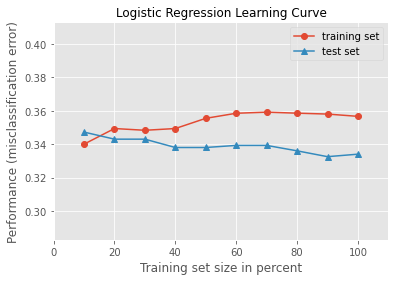

Model: Logistic Regression
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.89      0.74      2199
           1       0.74      0.40      0.52      1801

    accuracy                           0.67      4000
   macro avg       0.69      0.64      0.63      4000
weighted avg       0.69      0.67      0.64      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.633}


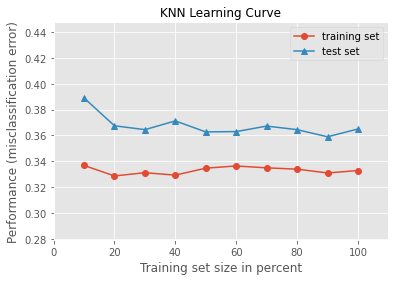

Model: KNN
Model score: 0.64
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.79      0.70      2199
           1       0.63      0.45      0.53      1801

    accuracy                           0.64      4000
   macro avg       0.63      0.62      0.61      4000
weighted avg       0.63      0.64      0.62      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635}


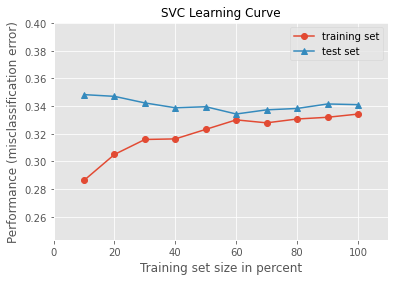

Model: SVC
Model score: 0.66
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      2199
           1       0.70      0.43      0.53      1801

    accuracy                           0.66      4000
   macro avg       0.67      0.64      0.63      4000
weighted avg       0.67      0.66      0.64      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635, 'SVC': 0.659}


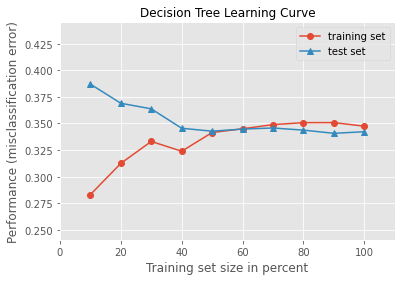

Model: Decision Tree
Model score: 0.66
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      2199
           1       0.69      0.43      0.53      1801

    accuracy                           0.66      4000
   macro avg       0.67      0.64      0.63      4000
weighted avg       0.67      0.66      0.64      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635, 'SVC': 0.659, 'Decision Tree': 0.658}


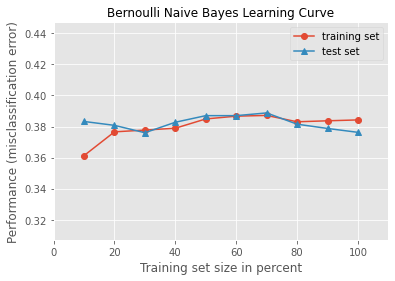

Model: Bernoulli Naive Bayes
Model score: 0.62
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      2199
           1       0.61      0.46      0.52      1801

    accuracy                           0.62      4000
   macro avg       0.62      0.61      0.61      4000
weighted avg       0.62      0.62      0.61      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635, 'SVC': 0.659, 'Decision Tree': 0.658, 'Bernoulli Naive Bayes': 0.624}


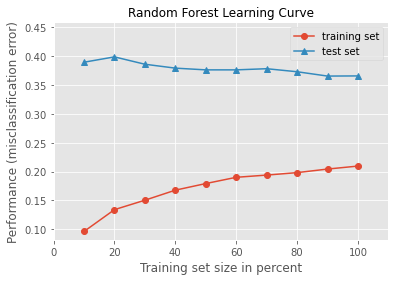

Model: Random Forest
Model score: 0.63
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.72      0.69      2199
           1       0.61      0.52      0.56      1801

    accuracy                           0.63      4000
   macro avg       0.63      0.62      0.62      4000
weighted avg       0.63      0.63      0.63      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635, 'SVC': 0.659, 'Decision Tree': 0.658, 'Bernoulli Naive Bayes': 0.624, 'Random Forest': 0.634}


In [46]:
for model, name in zip(classifiers, classifier_names):
    evaluate_model(model, X_test, y_test, name)

In [47]:
baseline_scores_df = pd.DataFrame.from_dict(baseline_score, orient = 'Index', columns = ['Scores'])
baseline_scores_df

,Scores
Logistic Regression,0.666
KNN,0.635
SVC,0.659
Decision Tree,0.658
Bernoulli Naive Bayes,0.624
Random Forest,0.634


# Bagging technique classifiers

In [48]:
# Create bagging models
logregbag = BaggingClassifier(base_estimator = LogisticRegression())
knnbag = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=21))
svcbag = BaggingClassifier(base_estimator = SVC(probability=True))
dtbag = BaggingClassifier(base_estimator= DecisionTreeClassifier(max_leaf_nodes=21, random_state = 7))
nbbag = BaggingClassifier(base_estimator= BernoulliNB())
rfbag = BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy', n_estimators= 85, max_features='auto', random_state=7))

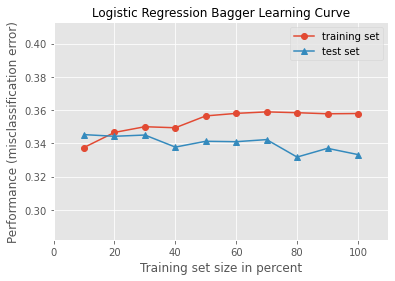

Model: Logistic Regression Bagger
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.88      0.74      2199
           1       0.73      0.40      0.52      1801

    accuracy                           0.66      4000
   macro avg       0.69      0.64      0.63      4000
weighted avg       0.68      0.66      0.64      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.667}


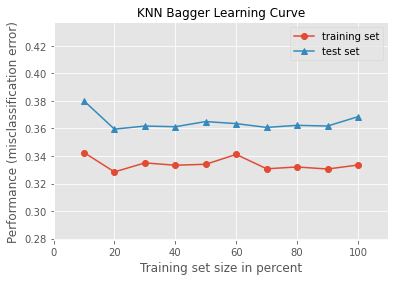

Model: KNN Bagger
Model score: 0.63
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2199
           1       0.63      0.49      0.55      1801

    accuracy                           0.64      4000
   macro avg       0.64      0.63      0.62      4000
weighted avg       0.64      0.64      0.63      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.667, 'KNN Bagger': 0.632}


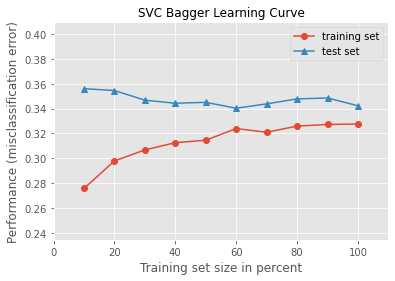

Model: SVC Bagger
Model score: 0.66
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.81      0.72      2199
           1       0.68      0.47      0.55      1801

    accuracy                           0.66      4000
   macro avg       0.66      0.64      0.64      4000
weighted avg       0.66      0.66      0.65      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.667, 'KNN Bagger': 0.632, 'SVC Bagger': 0.658}


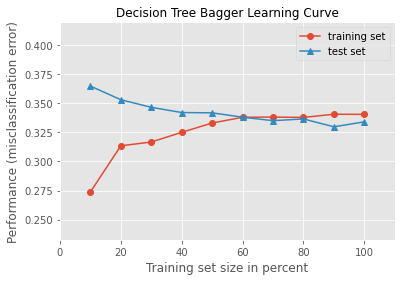

Model: Decision Tree Bagger
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.87      0.74      2199
           1       0.72      0.42      0.53      1801

    accuracy                           0.67      4000
   macro avg       0.68      0.64      0.64      4000
weighted avg       0.68      0.67      0.65      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.667, 'KNN Bagger': 0.632, 'SVC Bagger': 0.658, 'Decision Tree Bagger': 0.666}


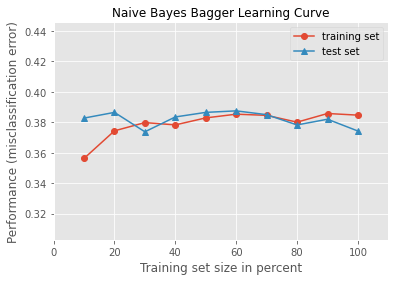

Model: Naive Bayes Bagger
Model score: 0.63
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      2199
           1       0.61      0.45      0.52      1801

    accuracy                           0.62      4000
   macro avg       0.62      0.61      0.60      4000
weighted avg       0.62      0.62      0.61      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.667, 'KNN Bagger': 0.632, 'SVC Bagger': 0.658, 'Decision Tree Bagger': 0.666, 'Naive Bayes Bagger': 0.626}


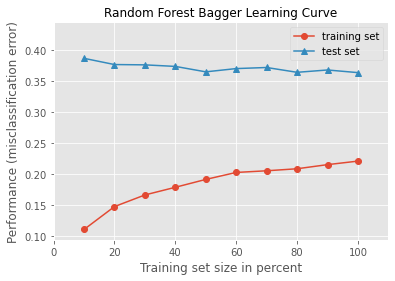

Model: Random Forest Bagger
Model score: 0.64
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      2199
           1       0.62      0.52      0.56      1801

    accuracy                           0.64      4000
   macro avg       0.63      0.63      0.63      4000
weighted avg       0.64      0.64      0.63      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.667, 'KNN Bagger': 0.632, 'SVC Bagger': 0.658, 'Decision Tree Bagger': 0.666, 'Naive Bayes Bagger': 0.626, 'Random Forest Bagger': 0.637}


In [49]:
baggers = [logregbag, knnbag, svcbag, dtbag, nbbag, rfbag]
bag_names = ['Logistic Regression Bagger', 'KNN Bagger', 'SVC Bagger', 'Decision Tree Bagger', 
            'Naive Bayes Bagger', 'Random Forest Bagger']
for bagger, name in zip(baggers, bag_names):
    bagger.fit(X_train, y_train)
    evaluate_bagger(bagger, X_test, y_test, name)

# Update Summary Table

In [52]:
print(list(bagging_score.values()))

[0.667, 0.632, 0.658, 0.666, 0.626, 0.637]


In [53]:
baseline_scores_df['Bagging Scores'] = list(bagging_score.values())
baseline_scores_df

,Scores,Bagging Scores
Logistic Regression,0.666,0.667
KNN,0.635,0.632
SVC,0.659,0.658
Decision Tree,0.658,0.666
Bernoulli Naive Bayes,0.624,0.626
Random Forest,0.634,0.637


- Bagging Classifying only improved at a minimal scale, not enough to be significant. 

# Ada Boosting

In [55]:
adaboost_scores = {}

def Ada_boosting_pipeline(model, X_train, X_test, y_train, y_test, model_name):
    booster = AdaBoostClassifier(base_estimator = model, n_estimators = 50)
    booster.fit(X_train, y_train)
    plt.figure()
    plot_learning_curves(X_train, y_train, X_test, y_test, booster, print_model = False, style = 'ggplot')
    plt.title(f'{model_name} AdaBoost')
    plt.show()
    preds = booster.predict(X_test)
    print(f'Model: {model_name} AdaBoost' )
    print('Model score:', round(booster.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    adaboost_scores[model_name] = round(booster.score(X_test, y_test),3)
    print('----------------------------------------------------------')
    print('AdaBoost Scores List')
    print(adaboost_scores)

In [56]:
adalr = LogisticRegression()
adadt = DecisionTreeClassifier(max_leaf_nodes = 21, random_state=7)
adanb = BernoulliNB()
adarf = RandomForestClassifier(criterion='entropy', n_estimators= 85, max_features='auto', random_state=7)

ada_classifiers = [adalr, adadt, adanb, adarf]
ada_names = ['Logistic Regression AdaBoosted', 'Decision Tree AdaBoosted', 'Naive Bayes AdaBoosted', 'Random Forest AdaBoosted']

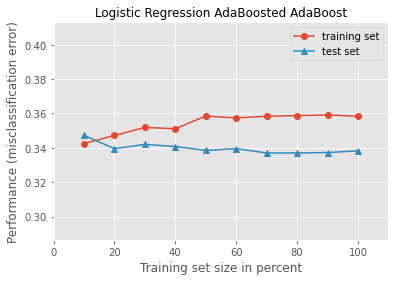

Model: Logistic Regression AdaBoosted AdaBoost
Model score: 0.66
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.87      0.74      2199
           1       0.72      0.41      0.52      1801

    accuracy                           0.66      4000
   macro avg       0.68      0.64      0.63      4000
weighted avg       0.68      0.66      0.64      4000

----------------------------------------------------------
AdaBoost Scores List
{'Logistic Regression AdaBoosted': 0.662}


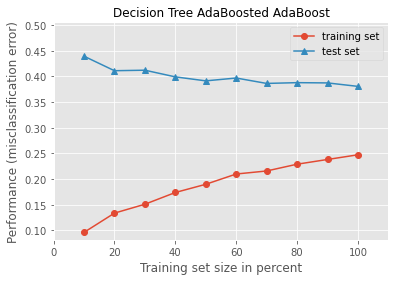

Model: Decision Tree AdaBoosted AdaBoost
Model score: 0.62
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.73      0.68      2199
           1       0.60      0.48      0.53      1801

    accuracy                           0.62      4000
   macro avg       0.61      0.61      0.61      4000
weighted avg       0.62      0.62      0.61      4000

----------------------------------------------------------
AdaBoost Scores List
{'Logistic Regression AdaBoosted': 0.662, 'Decision Tree AdaBoosted': 0.62}


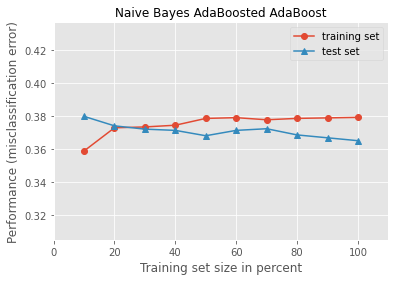

Model: Naive Bayes AdaBoosted AdaBoost
Model score: 0.64
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.80      0.71      2199
           1       0.64      0.43      0.51      1801

    accuracy                           0.64      4000
   macro avg       0.64      0.62      0.61      4000
weighted avg       0.64      0.64      0.62      4000

----------------------------------------------------------
AdaBoost Scores List
{'Logistic Regression AdaBoosted': 0.662, 'Decision Tree AdaBoosted': 0.62, 'Naive Bayes AdaBoosted': 0.635}


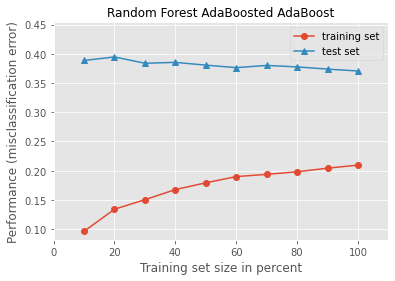

Model: Random Forest AdaBoosted AdaBoost
Model score: 0.63
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      2199
           1       0.60      0.53      0.56      1801

    accuracy                           0.63      4000
   macro avg       0.62      0.62      0.62      4000
weighted avg       0.63      0.63      0.63      4000

----------------------------------------------------------
AdaBoost Scores List
{'Logistic Regression AdaBoosted': 0.662, 'Decision Tree AdaBoosted': 0.62, 'Naive Bayes AdaBoosted': 0.635, 'Random Forest AdaBoosted': 0.63}


In [57]:
for model, name in zip(ada_classifiers,ada_names):
    Ada_boosting_pipeline(model, X_train, X_test, y_train, y_test, name)

In [59]:
ada_scores = list(adaboost_scores.values())
ada_scores = [0.662, 'N/A', 'N/A', 0.62, 0.635, 0.63]
baseline_scores_df['AdaBoost Scores'] = ada_scores
baseline_scores_df

,Scores,Bagging Scores,AdaBoost Scores
Logistic Regression,0.666,0.667,0.662
KNN,0.635,0.632,N/A
SVC,0.659,0.658,N/A
Decision Tree,0.658,0.666,0.62
Bernoulli Naive Bayes,0.624,0.626,0.635
Random Forest,0.634,0.637,0.63


- Ada Boost Classifier was unable to improve on any of the models.

# Gradient Boosting

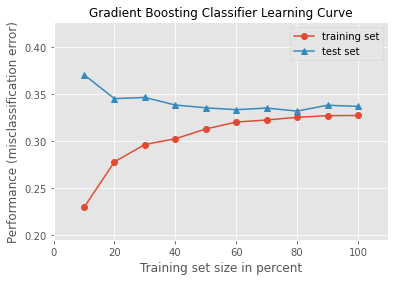

Model: Gradient Boosting Classifier
Model score: 0.66
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.86      0.74      2199
           1       0.71      0.42      0.53      1801

    accuracy                           0.66      4000
   macro avg       0.68      0.64      0.63      4000
weighted avg       0.68      0.66      0.64      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635, 'SVC': 0.659, 'Decision Tree': 0.658, 'Bernoulli Naive Bayes': 0.624, 'Random Forest': 0.634, 'Gradient Boosting Classifier': 0.663}


In [61]:
gbc = GradientBoostingClassifier(random_state=7)
gbc.fit(X_train, y_train)
evaluate_model(gbc, X_test, y_test, 'Gradient Boosting Classifier')

In [64]:
# update summary table
baseline_scores_df = baseline_scores_df.append(pd.Series({'Scores':'N/A', 'Bagging Scores': 'N/A', 'AdaBoost Scores': 'N/A'}, name = 'Gradient Boosting Classifier'))
baseline_scores_df

,Scores,Bagging Scores,AdaBoost Scores
Logistic Regression,0.666,0.667,0.662
KNN,0.635,0.632,N/A
SVC,0.659,0.658,N/A
Decision Tree,0.658,0.666,0.62
Bernoulli Naive Bayes,0.624,0.626,0.635
Random Forest,0.634,0.637,0.63
Gradient Boosting Classifier,N/A,N/A,N/A


In [65]:
baseline_scores_df['Gradient Boosting Score'] = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 0.663]
baseline_scores_df

,Scores,Bagging Scores,AdaBoost Scores,Gradient Boosting Score
Logistic Regression,0.666,0.667,0.662,N/A
KNN,0.635,0.632,N/A,N/A
SVC,0.659,0.658,N/A,N/A
Decision Tree,0.658,0.666,0.62,N/A
Bernoulli Naive Bayes,0.624,0.626,0.635,N/A
Random Forest,0.634,0.637,0.63,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.663


# XG Boost

In [70]:
xg = xgb.XGBClassifier()
params_xg = {'max_depth': np.arange(1, 10)}
xg_gs = GridSearchCV(xg, params_xg, cv = 5)
xg_gs.fit(X_train, y_train)
xg_best = xg_gs.best_estimator_
print(xg_best)

[19:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

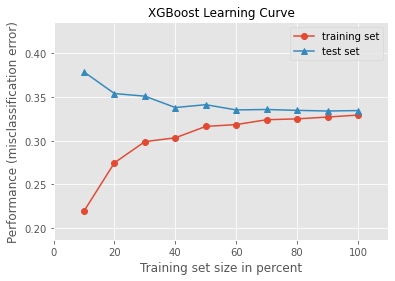

Model: XGBoost
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.85      0.74      2199
           1       0.70      0.45      0.55      1801

    accuracy                           0.67      4000
   macro avg       0.68      0.65      0.64      4000
weighted avg       0.67      0.67      0.65      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635, 'SVC': 0.659, 'Decision Tree': 0.658, 'Bernoulli Naive Bayes': 0.624, 'Random Forest': 0.634, 'Gradient Boosting Classifier': 0.663, 'XGBoost': 0.666}


In [71]:
xg_clf = xgb.XGBClassifier(learning_rate = 0.3, n_jobs = 24, tree_method = 'exact', max_depth = 2, seed = 7, objective = 'binary:logistic')
xg_clf.fit(X_train, y_train)
evaluate_model(xg_clf, X_test, y_test, 'XGBoost')

In [72]:
baseline_scores_df

,Scores,Bagging Scores,AdaBoost Scores,Gradient Boosting Score
Logistic Regression,0.666,0.667,0.662,N/A
KNN,0.635,0.632,N/A,N/A
SVC,0.659,0.658,N/A,N/A
Decision Tree,0.658,0.666,0.62,N/A
Bernoulli Naive Bayes,0.624,0.626,0.635,N/A
Random Forest,0.634,0.637,0.63,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.663


In [73]:
baseline_scores_df = baseline_scores_df.append(pd.Series({'Scores':'N/A', 'Bagging Scores': 'N/A', 'AdaBoost Scores': 'N/A', 'Gradient Boosting Score': 'N/A'}, name = 'XGBoost Classifier'))
baseline_scores_df['XGBoost Score'] = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 0.666]
baseline_scores_df

,Scores,Bagging Scores,AdaBoost Scores,Gradient Boosting Score,XGBoost Score
Logistic Regression,0.666,0.667,0.662,N/A,N/A
KNN,0.635,0.632,N/A,N/A,N/A
SVC,0.659,0.658,N/A,N/A,N/A
Decision Tree,0.658,0.666,0.62,N/A,N/A
Bernoulli Naive Bayes,0.624,0.626,0.635,N/A,N/A
Random Forest,0.634,0.637,0.63,N/A,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.663,N/A
XGBoost Classifier,N/A,N/A,N/A,N/A,0.666


- XGBoost was able to achieve one of the highest scores, but only by the smallest of margins.

# Stacking Classifier

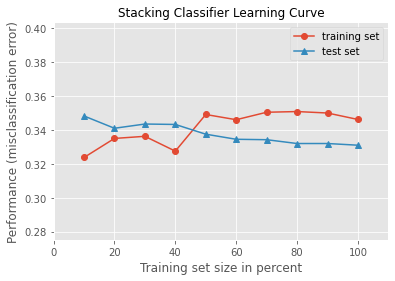

Model: Stacking Classifier
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.87      0.74      2199
           1       0.73      0.43      0.54      1801

    accuracy                           0.67      4000
   macro avg       0.69      0.65      0.64      4000
weighted avg       0.68      0.67      0.65      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635, 'SVC': 0.659, 'Decision Tree': 0.658, 'Bernoulli Naive Bayes': 0.624, 'Random Forest': 0.634, 'Gradient Boosting Classifier': 0.663, 'XGBoost': 0.666, 'Stacking Classifier': 0.669}


In [75]:
stacking_estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_leaf_nodes = 21, random_state=7)),
    ('nb', BernoulliNB())
]
stacker = StackingClassifier(estimators = stacking_estimators)
stacker.fit(X_train, y_train)
evaluate_model(stacker, X_test, y_test, 'Stacking Classifier')

In [77]:
baseline_scores_df = baseline_scores_df.append(pd.Series({'Baseline Scores':'N/A', 'Bagging Scores': 'N/A', 'AdaBoost Scores': 'N/A', 'Gradient Boost Score': 'N/A', 'XGBoost Score': 'N/A'}, name = 'Stacking Classifier'))
baseline_scores_df['Stacking Classifier Score'] = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 0.669]
baseline_scores_df

,Scores,Bagging Scores,AdaBoost Scores,Gradient Boosting Score,XGBoost Score,Baseline Scores,Gradient Boost Score,Stacking Classifier Score
Logistic Regression,0.666,0.667,0.662,N/A,N/A,NaN,NaN,N/A
KNN,0.635,0.632,N/A,N/A,N/A,NaN,NaN,N/A
SVC,0.659,0.658,N/A,N/A,N/A,NaN,NaN,N/A
Decision Tree,0.658,0.666,0.62,N/A,N/A,NaN,NaN,N/A
Bernoulli Naive Bayes,0.624,0.626,0.635,N/A,N/A,NaN,NaN,N/A
Random Forest,0.634,0.637,0.63,N/A,N/A,NaN,NaN,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.663,N/A,NaN,NaN,N/A
XGBoost Classifier,N/A,N/A,N/A,N/A,0.666,NaN,NaN,N/A
Stacking Classifier,NaN,N/A,N/A,NaN,N/A,N/A,N/A,0.669


n metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'e

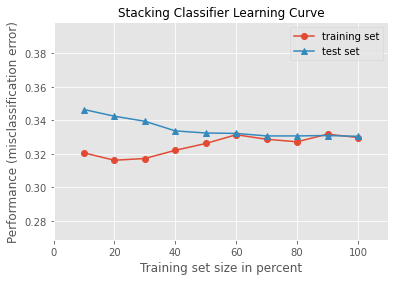

Model: Stacking Classifier
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.86      0.74      2199
           1       0.72      0.44      0.54      1801

    accuracy                           0.67      4000
   macro avg       0.68      0.65      0.64      4000
weighted avg       0.68      0.67      0.65      4000

----------------------------------------------------------
Baseline Scores List
{'Logistic Regression': 0.666, 'KNN': 0.635, 'SVC': 0.659, 'Decision Tree': 0.658, 'Bernoulli Naive Bayes': 0.624, 'Random Forest': 0.634, 'Gradient Boosting Classifier': 0.663, 'XGBoost': 0.666, 'Stacking Classifier': 0.67}


In [78]:
stacking_estimators = [
    ('lr', LogisticRegression()),
    ('xgb', xgb.XGBClassifier(learning_rate = 0.3, n_jobs = 24, tree_method = 'exact', max_depth = 2, seed = 7, objective = 'binary:logistic')),
    ('gb', GradientBoostingClassifier(random_state=7))
]
stacker = StackingClassifier(estimators = stacking_estimators)
stacker.fit(X_train, y_train)
evaluate_model(stacker, X_test, y_test, 'Stacking Classifier')

In [81]:
baseline_scores_df.drop(columns = ['Baseline Scores', 'Gradient Boost Score'], inplace = True)
baseline_scores_df

,Scores,Bagging Scores,AdaBoost Scores,Gradient Boosting Score,XGBoost Score,Stacking Classifier Score
Logistic Regression,0.666,0.667,0.662,N/A,N/A,N/A
KNN,0.635,0.632,N/A,N/A,N/A,N/A
SVC,0.659,0.658,N/A,N/A,N/A,N/A
Decision Tree,0.658,0.666,0.62,N/A,N/A,N/A
Bernoulli Naive Bayes,0.624,0.626,0.635,N/A,N/A,N/A
Random Forest,0.634,0.637,0.63,N/A,N/A,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.663,N/A,N/A
XGBoost Classifier,N/A,N/A,N/A,N/A,0.666,N/A
Stacking Classifier,NaN,N/A,N/A,NaN,N/A,0.669


In [82]:
# Create final df
results = {
    'Logistic Regression': 0.66,
    'KNN': 0.635,
    'SVC': 0.659,
    'Decision Tree': 0.658,
    'BernoulliNB': 0.624,
    'Random Forest': 0.634,
    'Bagging: Logistic Regression': 0.667,
    'Bagging: KNN': 0.632,
    'Bagging: SVC': 0.658,
    'Bagging: Decision Tree': 0.666,
    'Bagging: Bernoulli NB': 0.626,
    'Ada Boost: Logistic Regression': 0.662,
    'Ada Boost: Decision Tree': 0.62,
    'Ada Boost: Bernoulli NB': 0.635,
    'Ada Boost: Random Forest': 0.63,
    'Gradient Boost Classifier': 0.663,
    'XGBoost': 0.666,
    'Stacking': 0.669
    }
results = pd.DataFrame.from_dict(results, orient='index', columns = ['Scores'])
results.sort_values(by = 'Scores', ascending= False, inplace = True)
results

,Scores
Stacking,0.669
Bagging: Logistic Regression,0.667
XGBoost,0.666
Bagging: Decision Tree,0.666
Gradient Boost Classifier,0.663
Ada Boost: Logistic Regression,0.662
Logistic Regression,0.660
SVC,0.659
Decision Tree,0.658
Bagging: SVC,0.658


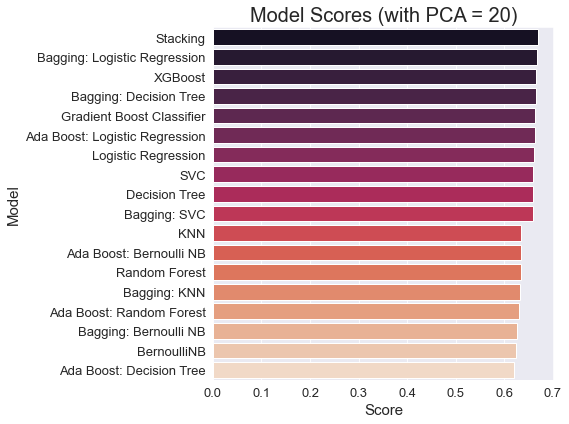

In [84]:
# Visualize data
plt.figure(figsize=(8, 6))
ax = sns.set_style('darkgrid')
ax = sns.barplot(y=results.index, x = results['Scores'], palette = 'rocket')
ax.set_ylabel('Model', fontsize = 15)
ax.set_xlabel('Score', fontsize = 15)
ax.axes.set_title('Model Scores (with PCA = 20)', fontsize = 20)
plt.xticks()
plt.tick_params(labelsize = 13)
plt.tight_layout()